<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/lab11/time_series_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# population trends by country through clustering analysis

In [1]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np

# Data ingestion

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# mkdir drive/My\ Drive/dsps


mkdir: cannot create directory ‘drive/My Drive/dsps’: File exists


In [4]:
# cd drive/My\ Drive/dsps

/content/drive/My Drive/dsps


In [ ]:
# get data
# !wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel


In [10]:
datain = pd.read_excel("API_SP.POP.TOTL_DS2_en_excel_v2_422160.xls", usecols=[0] + 
              list(range(4,100)), skiprows=[1,2]).set_index("Data Source")

datain.columns = datain.iloc[0]
datain.drop("Country Name", inplace=True)
datain.head()

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Data Source,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN


In [12]:
datain.describe()

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.630000e+02,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,0.0
mean,1.180664e+08,1.196487e+08,1.217640e+08,1.243969e+08,1.270502e+08,1.297689e+08,1.326321e+08,1.354859e+08,1.383920e+08,1.414415e+08,...,2.771861e+08,2.806647e+08,2.852876e+08,2.889023e+08,2.925508e+08,2.962148e+08,2.999114e+08,3.035995e+08,3.072302e+08,NaN
std,3.730942e+08,3.775621e+08,3.841278e+08,3.926847e+08,4.012844e+08,4.101198e+08,4.195221e+08,4.288621e+08,4.384146e+08,4.484547e+08,...,8.819670e+08,8.924886e+08,9.047110e+08,9.155191e+08,9.264022e+08,9.373108e+08,9.483019e+08,9.592829e+08,9.700134e+08,NaN
min,3.893000e+03,3.989000e+03,4.076000e+03,4.183000e+03,4.308000e+03,4.468000e+03,4.685000e+03,4.920000e+03,5.193000e+03,5.459000e+03,...,1.000500e+04,1.005700e+04,1.027900e+04,1.082100e+04,1.097200e+04,1.109900e+04,1.122500e+04,1.137000e+04,1.150800e+04,NaN
25%,5.022908e+05,5.109635e+05,5.206552e+05,5.311588e+05,5.421285e+05,5.533358e+05,5.647510e+05,5.823600e+05,5.981080e+05,6.100040e+05,...,1.427037e+06,1.449584e+06,1.409858e+06,1.427339e+06,1.444866e+06,1.463189e+06,1.514952e+06,1.577592e+06,1.638404e+06,NaN
50%,3.658470e+06,3.738358e+06,3.821016e+06,3.926268e+06,4.051891e+06,4.180652e+06,4.275565e+06,4.344568e+06,4.415026e+06,4.455048e+06,...,9.378126e+06,9.460830e+06,9.624311e+06,9.746730e+06,9.855382e+06,1.000153e+07,1.012427e+07,1.017900e+07,1.023247e+07,NaN
75%,2.532671e+07,2.611452e+07,2.690411e+07,2.766416e+07,2.839934e+07,2.913676e+07,2.988608e+07,3.059503e+07,3.120239e+07,3.179527e+07,...,5.090889e+07,5.149739e+07,5.247893e+07,5.323004e+07,5.397970e+07,5.470996e+07,5.541544e+07,5.641631e+07,5.741430e+07,NaN
max,3.032020e+09,3.073078e+09,3.126066e+09,3.191186e+09,3.256700e+09,3.323624e+09,3.393699e+09,3.463147e+09,3.533537e+09,3.608236e+09,...,6.922947e+09,7.004011e+09,7.086994e+09,7.170962e+09,7.255654e+09,7.340548e+09,7.426103e+09,7.510990e+09,7.594270e+09,NaN


# TASK I a

In [11]:
print("there are {} countries and {} time stamps in the data".
      format(*datain.shape))

there are 264 countries and 60 time stamps in the data


Cleaning the data from NaNs

In [13]:
datain = datain.dropna(axis=1, how='all')
(datain.isna().sum()>0).sum()

59

In [15]:
datain = datain.dropna(axis=0)

In [16]:
(datain.isna().sum()>0).sum()

0

# TASK Ib

# print the number of countries and the length of the timeline

In [17]:
print("there are {} countries and {} time stamps in the data".
      format(*datain.shape))

there are 258 countries and 59 time stamps in the data


# TASK II

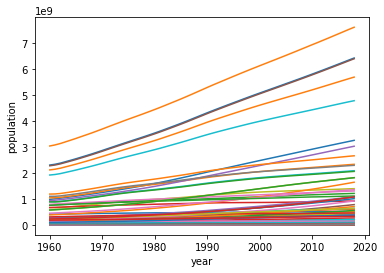

In [18]:
ax = datain.T.plot(legend=False);
ax.set_xlabel("year")
ax.set_ylabel("population");


Figure 1. The population vs. years for all countries.

# TASK III

# Preprocessing
These are time series so *they cannot be whitened*
They should be scaled along the observation axis instead

In [20]:
X = preprocessing.scale(datain, axis=1)
# X.mean(axis=1).shape, X.mean(axis=1)


/Users/home/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [21]:
X.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

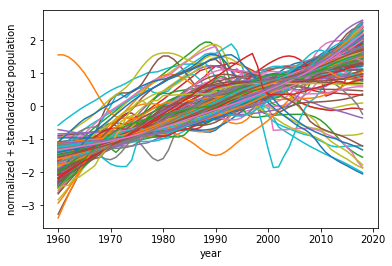

In [22]:
pl.figure()
pl.plot(X.T);
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");


Figure 2. The scaled population vs. years for all countries.

# TASK IV

# clustering

# cluster the data in 2 to 10 clusters and print the total variance for each cluster. 
# Plot the total variance as a function of number of clusters

In [24]:
from sklearn import cluster

i.c. variance 2498.198837646756
i.c. variance 1152.93801972529
i.c. variance 796.3224336279306
i.c. variance 596.1854652807191
i.c. variance 517.5033829457968
i.c. variance 443.9145480174351
i.c. variance 400.2225078915865
i.c. variance 368.6984855268596
i.c. variance 327.86511433475704


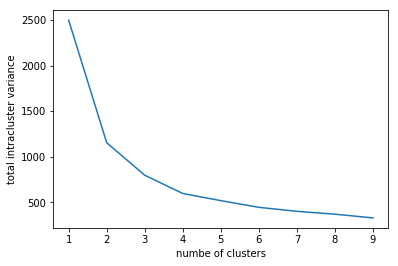

In [25]:
nmaxc = 10
nc = []
for i in range(1, nmaxc):
    c = cluster.k_means(X, i)
    nc.append(c[2])
    print("i.c. variance", c[2])
pl.plot(range(1, nmaxc), nc)
pl.xlabel("numbe of clusters")
pl.ylabel("total intracluster variance");

Figure 3. Total intracluster variance vs. number of clusters.

# what is the appropriate number of clusters?

> It looks like 4 or 5 is the approrpriate number of clusters.

# TASK V

pick some number of clusters and
- cluster the time series with k-means and the chosen number of cluster
- print the number of time series in each cluster
- for each cluster plot the cluster center and each time series that belong to that center in the same plot
- print the names of the countries in the smallest cluster

In [26]:
# making sure I am clustering along the right axis: 
# each cluster center should be as long as the timeline: 59
X.shape, c[0].shape

((258, 59), (9, 59))

In [27]:
X_clusters = cluster.KMeans(n_clusters=4).fit(X)


In [93]:
# print the number of time series in each cluster
cluster, counts = np.unique(X_clusters.labels_, return_counts=True)
df = pd.DataFrame()
df['cluster'] = cluster
df['counts'] = counts
df

,cluster,counts
0,0,123
1,1,99
2,2,10
3,3,26


In [32]:
from sklearn.manifold import TSNE

In [33]:
# 2d projection
twodproj = TSNE(n_components=2).fit_transform(X)


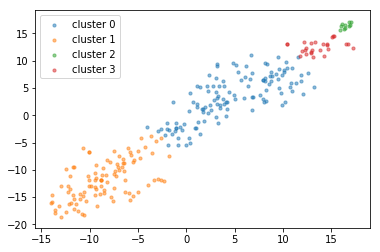

In [83]:
x = twodproj[:, 0]
y = twodproj[:, 1]
for c in [0,1,2,3]:
    idx = X_clusters.labels_== c
    pl.scatter(x[idx], y[idx], alpha=0.5, s=10.0, label='cluster %i'%c)
pl.legend()

Figure 4. 2D projection of the population datasets. The color represents the clusters.

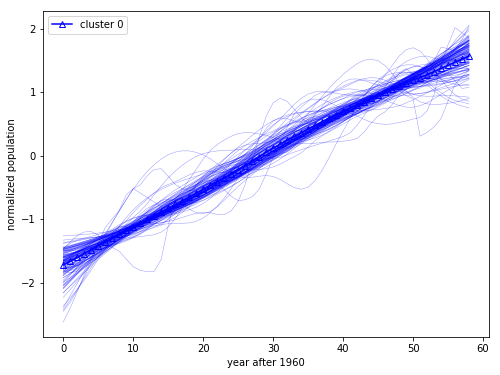

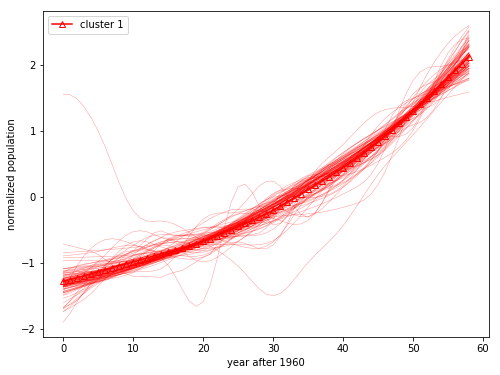

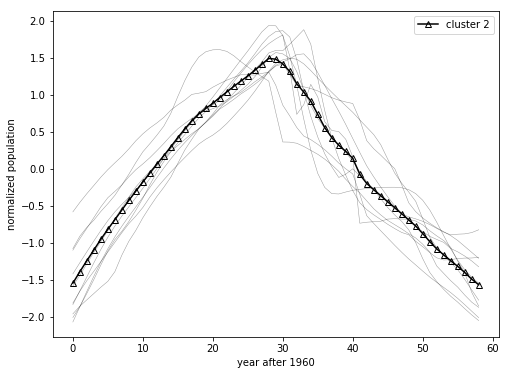

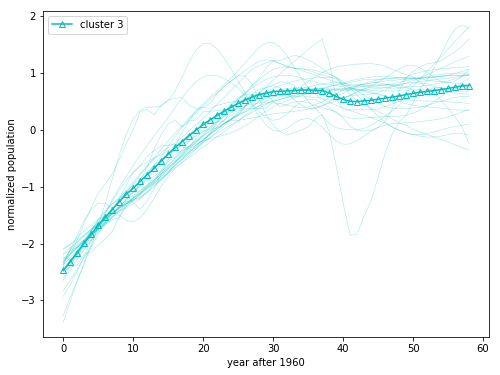

In [131]:
# plot time series for each cluster
 
colors = ['b', 'r', 'k', 'c']
for i in [0,1,2,3]:
    pl.figure(figsize=(8, 6))
    pl.plot( X[X_clusters.labels_==i].T, alpha=0.4, c=colors[i], linewidth=0.5)
    pl.plot(X_clusters.cluster_centers_[i].T, c=colors[i], 
            marker='^', markerfacecolor='None', label='cluster %i'%i)
    pl.legend()
    pl.xlabel('year after 1960')
    pl.ylabel('normalized population')



Figure 5. The cluster centers and each time series that belong to that center for four different clusters.

In [98]:
# print the cluster with least number of countries
datain.iloc[X_clusters.labels_==2]

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
Data Source,,,,,,,,,,,,,,,,,,,,,
Bulgaria,7867374.0,7943118.0,8012946.0,8078145.0,8144340.0,8204168.0,8258057.0,8310226.0,8369603.0,8434172.0,...,7444443.0,7395599.0,7348328.0,7305888.0,7265115.0,7223938.0,7177991.0,7127822.0,7075947.0,7024216.0
Bosnia and Herzegovina,3225668.0,3288603.0,3353226.0,3417574.0,3478997.0,3535643.0,3586636.0,3632672.0,3675454.0,3717468.0,...,3735938.0,3705472.0,3661175.0,3604972.0,3542605.0,3482104.0,3429361.0,3386267.0,3351527.0,3323929.0
Estonia,1211537.0,1225077.0,1241623.0,1258857.0,1277086.0,1294566.0,1308597.0,1318946.0,1331214.0,1345249.0,...,1334515.0,1331475.0,1327439.0,1322696.0,1317997.0,1314545.0,1315407.0,1315790.0,1317384.0,1320884.0
Georgia,3645600.0,3703600.0,3760300.0,3816100.0,3870300.0,3921600.0,3966700.0,4005800.0,4042300.0,4080300.0,...,3814419.0,3786695.0,3756441.0,3728874.0,3717668.0,3719414.0,3725276.0,3727505.0,3728004.0,3731000.0
Croatia,4140181.0,4167292.0,4196712.0,4225675.0,4252876.0,4280923.0,4310701.0,4338683.0,4365628.0,4391490.0,...,4305181.0,4295427.0,4280622.0,4267558.0,4255689.0,4238389.0,4203604.0,4174349.0,4124531.0,4089400.0
Hungary,9983967.0,10029321.0,10061734.0,10087947.0,10119835.0,10147935.0,10178653.0,10216604.0,10255815.0,10298723.0,...,10022650.0,10000023.0,9971727.0,9920362.0,9893082.0,9866468.0,9843028.0,9814023.0,9787966.0,9768785.0
Lithuania,2778550.0,2823550.0,2863350.0,2898950.0,2935200.0,2971450.0,3008050.0,3044400.0,3078850.0,3107321.0,...,3162916.0,3097282.0,3028115.0,2987773.0,2957689.0,2932367.0,2904910.0,2868231.0,2828403.0,2789533.0
Latvia,2120979.0,2152681.0,2181586.0,2210919.0,2240623.0,2265919.0,2283217.0,2301220.0,2323619.0,2343173.0,...,2141669.0,2097555.0,2059709.0,2034319.0,2012647.0,1993782.0,1977527.0,1959537.0,1942248.0,1926542.0
Romania,18406905.0,18555250.0,18676550.0,18797850.0,18919126.0,19031576.0,19215450.0,19534242.0,19799831.0,20009141.0,...,20367487.0,20246871.0,20147528.0,20058035.0,19983693.0,19908979.0,19815481.0,19702332.0,19587491.0,19473936.0


These are all eastern European countries, their changes of population are similar with each other.  